In [2]:
import numpy as np

In [3]:
from scipy.io import loadmat
from scipy.linalg import expm, logm
from scipy.special import comb

In [4]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data_path = 'dat/time_series/cup/cleaned/'

In [6]:
from os import listdir
file_names = listdir(data_path)

In [24]:
n = 100
data = np.zeros((n, 268, 350))
for i in range(n):
    data[i, :, :] = loadmat(data_path + file_names[i])['TC_Data']

In [25]:
ROIs = [i - 1 for i in (186, 90, 71, 14, 247, 20, 110, 288, 193, 121)]
data = data[:, :, ROIs]

In [26]:
p = len(ROIs)
q = comb(p + 1, 2, exact = True)
L = 30
n_windows = 268 - L

In [27]:
cov_series = np.zeros((n, 268 - L, p, p))  
utv_series = np.zeros((n, 268 - L, q))
for i in range(n):
    for t in range(L, 268 - L):
        data_window = data[i, (t - L):t, :]
        cov = np.cov(data_window, rowvar=False)
        cov_series[i, t, :, :] = cov
        utv = logm(cov)[np.triu_indices(p)]
        utv_series[i, t, :] = utv

In [28]:
all_vector = np.concatenate([utv_series]).reshape((n * (268 - L), q))
Y = all_vector - np.mean(all_vector, axis=0)
print(Y.shape)

(23800, 55)


In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=4)
components = pca.fit_transform(Y)

In [31]:
Y_hat = pca.inverse_transform(components)
mse = np.mean((Y - Y_hat) ** 2)
print(mse)

0.11196040602968313


In [32]:
print(pca.explained_variance_ratio_)

[0.29021311 0.07535366 0.05840202 0.03424097]


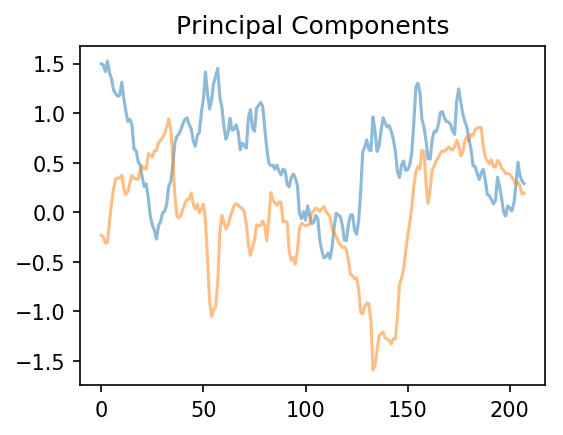

In [19]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for j in range(2):
    plt.plot(components[L:n_windows, j], alpha=0.5)
plt.title('Principal Components')
plt.show()

In [16]:
from factorgp import FactorGP
from inference import run_gibbs

In [17]:
t = n_windows
r = 2

In [18]:
dims = [n, t, q, r]
model = FactorGP(dims)
model.update_conditional_latent(Y)

In [19]:
results = run_gibbs(Y, model, 50, 50, 0.5, verbose=True)

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

Current MSE: 0.17075194296147056
Current length scale: [1.35014665 1.67243605]


  2%|█▌                                                                              | 1/50 [01:59<1:37:42, 119.65s/it]

Current MSE: 0.15886539368817634
Current length scale: [1.45411423 1.70704966]


  4%|███▏                                                                            | 2/50 [03:58<1:35:36, 119.51s/it]

Current MSE: 0.15502419291887778
Current length scale: [1.45411423 1.708491  ]


  6%|████▊                                                                           | 3/50 [05:57<1:33:20, 119.17s/it]

Current MSE: 0.15259530782054345
Current length scale: [1.55248923 1.75632281]


  8%|██████▍                                                                         | 4/50 [07:54<1:30:52, 118.53s/it]

Current MSE: 0.1522180914001338
Current length scale: [1.58040966 1.77624692]


 10%|████████                                                                        | 5/50 [09:53<1:28:57, 118.60s/it]

Current MSE: 0.1534695470596847
Current length scale: [1.62903665 1.80106687]


 12%|█████████▌                                                                      | 6/50 [11:52<1:27:11, 118.90s/it]

Current MSE: 0.1543696562281717
Current length scale: [1.65906919 1.83072421]


 14%|███████████▏                                                                    | 7/50 [13:51<1:25:13, 118.92s/it]

Current MSE: 0.15467428854311746
Current length scale: [1.69411584 1.8646928 ]


 16%|████████████▊                                                                   | 8/50 [15:49<1:22:59, 118.56s/it]

Current MSE: 0.1547780528468223
Current length scale: [1.70905299 1.90246517]


 18%|██████████████▍                                                                 | 9/50 [17:48<1:21:11, 118.82s/it]

Current MSE: 0.15468588384178555
Current length scale: [1.73704961 1.93293817]


 20%|███████████████▊                                                               | 10/50 [19:47<1:19:16, 118.91s/it]

Current MSE: 0.15481477349257228
Current length scale: [1.77625626 1.98055464]


 22%|█████████████████▍                                                             | 11/50 [21:48<1:17:36, 119.39s/it]

Current MSE: 0.1546556893327379
Current length scale: [1.77625626 2.01649605]


 24%|██████████████████▉                                                            | 12/50 [23:48<1:15:46, 119.66s/it]

Current MSE: 0.15465255490581367
Current length scale: [1.79339347 2.0543322 ]


 26%|████████████████████▌                                                          | 13/50 [25:48<1:13:47, 119.67s/it]

Current MSE: 0.15458697667223448
Current length scale: [1.82042208 2.06374956]


 28%|██████████████████████                                                         | 14/50 [27:47<1:11:43, 119.54s/it]

Current MSE: 0.1545452356523075
Current length scale: [1.82042208 2.09189319]


 30%|███████████████████████▋                                                       | 15/50 [31:48<1:31:02, 156.08s/it]

Current MSE: 0.1545265288926595
Current length scale: [1.82042208 2.10830301]


 32%|█████████████████████████▎                                                     | 16/50 [33:58<1:23:53, 148.05s/it]

Current MSE: 0.15455967434260143
Current length scale: [1.82042208 2.14087447]


 34%|██████████████████████████▊                                                    | 17/50 [35:58<1:16:53, 139.81s/it]

Current MSE: 0.15446946576436324
Current length scale: [1.84878478 2.17424448]


 36%|████████████████████████████▍                                                  | 18/50 [37:59<1:11:29, 134.04s/it]

Current MSE: 0.15444628871256377
Current length scale: [1.84878478 2.23072442]


 38%|██████████████████████████████                                                 | 19/50 [40:00<1:07:11, 130.04s/it]

Current MSE: 0.1544774381558297
Current length scale: [1.87122548 2.27521345]


 40%|███████████████████████████████▌                                               | 20/50 [42:05<1:04:22, 128.76s/it]

Current MSE: 0.1543683716273267
Current length scale: [1.90204346 2.31034475]


 42%|█████████████████████████████████▏                                             | 21/50 [44:13<1:02:06, 128.50s/it]

Current MSE: 0.15432594048641002
Current length scale: [1.91982394 2.31035218]


 44%|███████████████████████████████████▋                                             | 22/50 [46:16<59:08, 126.73s/it]

Current MSE: 0.1542187479913611
Current length scale: [1.93440314 2.3557014 ]


 46%|█████████████████████████████████████▎                                           | 23/50 [48:19<56:36, 125.78s/it]

Current MSE: 0.15432224349279255
Current length scale: [1.97289696 2.40527977]


 48%|██████████████████████████████████████▉                                          | 24/50 [50:21<53:58, 124.57s/it]

Current MSE: 0.1541859893062382
Current length scale: [1.99980447 2.44812785]


 50%|████████████████████████████████████████▌                                        | 25/50 [52:24<51:43, 124.13s/it]

Current MSE: 0.15420318811674114
Current length scale: [2.03289488 2.48212918]


 52%|██████████████████████████████████████████                                       | 26/50 [54:27<49:30, 123.77s/it]

Current MSE: 0.15417188118620626
Current length scale: [2.06059332 2.48212918]


 54%|███████████████████████████████████████████▋                                     | 27/50 [56:28<47:08, 122.99s/it]

Current MSE: 0.1541429994396188
Current length scale: [2.08493247 2.51348725]


 56%|█████████████████████████████████████████████▎                                   | 28/50 [58:30<44:59, 122.69s/it]

Current MSE: 0.15411443050428955
Current length scale: [2.10336909 2.54593469]


 58%|█████████████████████████████████████████████▊                                 | 29/50 [1:00:33<42:53, 122.53s/it]

Current MSE: 0.15402838607139768
Current length scale: [2.10336909 2.58617743]


 60%|███████████████████████████████████████████████▍                               | 30/50 [1:02:34<40:46, 122.35s/it]

Current MSE: 0.15409730508023722
Current length scale: [2.12472368 2.61907876]


 62%|████████████████████████████████████████████████▉                              | 31/50 [1:04:37<38:47, 122.48s/it]

Current MSE: 0.15409962209797506
Current length scale: [2.13782969 2.64521221]


 64%|██████████████████████████████████████████████████▌                            | 32/50 [1:06:38<36:37, 122.10s/it]

Current MSE: 0.15408594005154838
Current length scale: [2.17166695 2.68391616]


 66%|████████████████████████████████████████████████████▏                          | 33/50 [1:08:41<34:36, 122.12s/it]

Current MSE: 0.15407947953414444
Current length scale: [2.17166695 2.71331229]


 68%|█████████████████████████████████████████████████████▋                         | 34/50 [1:10:42<32:31, 122.00s/it]

Current MSE: 0.15400066512949853
Current length scale: [2.20807139 2.77211266]


 70%|█████████████████████████████████████████████████████▏                      | 35/50 [2:29:19<6:15:06, 1500.44s/it]

Current MSE: 0.15399756407057758
Current length scale: [2.21991845 2.82062844]


 72%|██████████████████████████████████████████████████████▋                     | 36/50 [2:31:24<4:13:48, 1087.73s/it]

Current MSE: 0.15401942972224997
Current length scale: [2.21991845 2.87280349]


 74%|████████████████████████████████████████████████████████▉                    | 37/50 [2:33:31<2:53:15, 799.64s/it]

Current MSE: 0.15398814445032027
Current length scale: [2.22062223 2.92129579]


 76%|██████████████████████████████████████████████████████████▌                  | 38/50 [2:36:07<2:01:18, 606.53s/it]

Current MSE: 0.15393956225804026
Current length scale: [2.23134491 2.9458124 ]


 78%|████████████████████████████████████████████████████████████                 | 39/50 [2:39:24<1:28:40, 483.71s/it]

Current MSE: 0.15392972435789004
Current length scale: [2.2374916 2.9798753]


 80%|█████████████████████████████████████████████████████████████▌               | 40/50 [2:42:40<1:06:13, 397.39s/it]

Current MSE: 0.1539243450280792
Current length scale: [2.26042016 3.01788023]


 82%|████████████████████████████████████████████████████████████████▊              | 41/50 [2:46:10<51:09, 341.09s/it]

Current MSE: 0.1538238860819941
Current length scale: [2.28290394 3.05661892]


 84%|██████████████████████████████████████████████████████████████████▎            | 42/50 [2:49:32<39:55, 299.46s/it]

Current MSE: 0.15385888607890955
Current length scale: [2.29625964 3.09505641]


 86%|███████████████████████████████████████████████████████████████████▉           | 43/50 [2:52:41<31:03, 266.26s/it]

Current MSE: 0.15386668512981486
Current length scale: [2.33476498 3.11963023]


 88%|█████████████████████████████████████████████████████████████████████▌         | 44/50 [2:55:18<23:20, 233.50s/it]

Current MSE: 0.15394746448688967
Current length scale: [2.3513324  3.14348681]


 90%|███████████████████████████████████████████████████████████████████████        | 45/50 [2:58:24<18:15, 219.17s/it]

Current MSE: 0.1538431445212521
Current length scale: [2.36220347 3.20585425]


 92%|████████████████████████████████████████████████████████████████████████▋      | 46/50 [3:01:36<14:03, 210.95s/it]

Current MSE: 0.15386790791036967
Current length scale: [2.39303083 3.26162378]


 94%|██████████████████████████████████████████████████████████████████████████▎    | 47/50 [3:04:39<10:08, 202.76s/it]

Current MSE: 0.15389113055807527
Current length scale: [2.39303083 3.26162378]


 96%|███████████████████████████████████████████████████████████████████████████▊   | 48/50 [3:07:46<06:35, 197.93s/it]

Current MSE: 0.15385783724815671
Current length scale: [2.40407683 3.30262184]


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 49/50 [3:11:09<03:19, 199.57s/it]

Current MSE: 0.1538022785699304
Current length scale: [2.41990418 3.30691196]


100%|███████████████████████████████████████████████████████████████████████████████| 50/50 [3:14:23<00:00, 197.70s/it]


In [ ]:
results

In [20]:
F_sample, loading_sample, variance_sample, theta_sample, traces_hist, mse_history = results

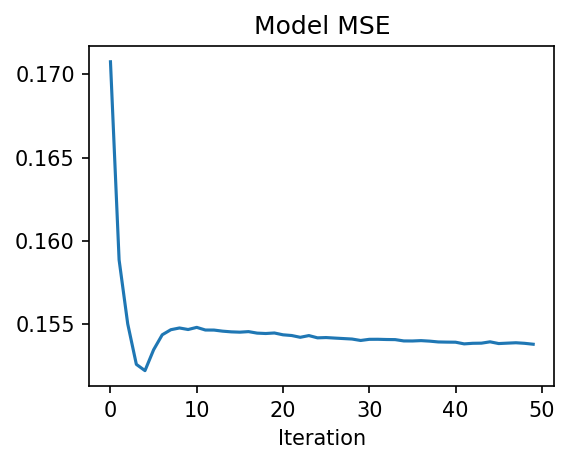

In [21]:
fig = plt.figure(figsize=(4, 3), dpi=150)
plt.plot(mse_history)
plt.title('Model MSE')
plt.xlabel('Iteration')
plt.show()

In [22]:
print(F_sample.shape)

(50, 61642, 2)


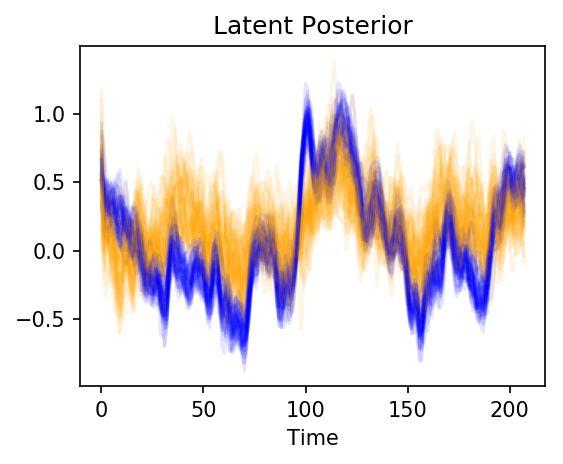

In [23]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(50):
    plt.plot(F_sample[i, L:n_windows, 0], color='orange', alpha=0.1)
    plt.plot(F_sample[i, L:n_windows, 1], color='blue', alpha=0.1)
plt.title('Latent Posterior')
plt.xlabel('Time')
plt.show()

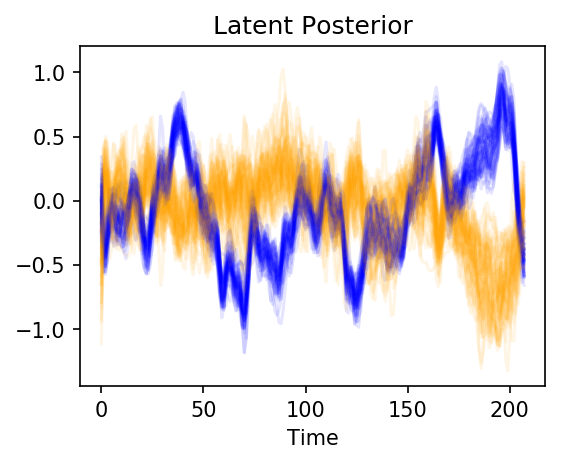

In [24]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(50):
    plt.plot(-1 * F_sample[i, (1 * n_windows + L):(2 * n_windows), 0], color='orange', alpha=0.1)
    plt.plot(F_sample[i, (1 * n_windows + L):(2 * n_windows), 1], color='blue', alpha=0.1)
plt.title('Latent Posterior')
plt.xlabel('Time')
plt.show()

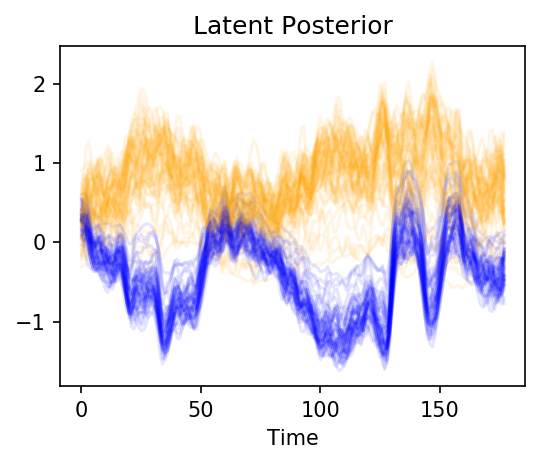

In [25]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(50):
    plt.plot(-1 * F_sample[i, (2 * (n_windows + L)):(3 * n_windows), 0], color='orange', alpha=0.1)
    plt.plot(F_sample[i, (2 * (n_windows + L)):(3 * n_windows), 1], color='blue', alpha=0.1)
plt.title('Latent Posterior')
plt.xlabel('Time')
plt.show()

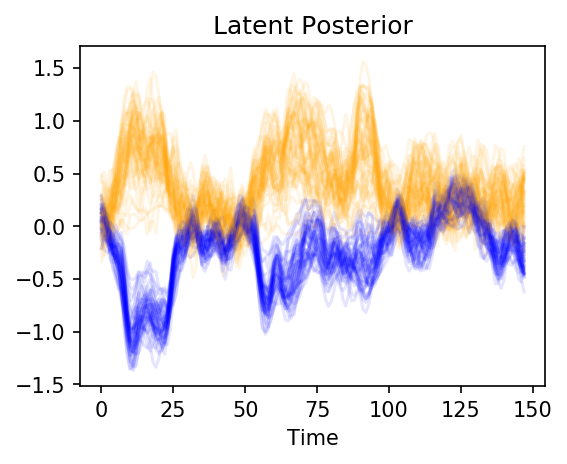

In [26]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(50):
    plt.plot(-1 * F_sample[i, (3 * (n_windows + L)):(4 * n_windows), 0], color='orange', alpha=0.1)
    plt.plot(F_sample[i, (3 * (n_windows + L)):(4 * n_windows), 1], color='blue', alpha=0.1)
plt.title('Latent Posterior')
plt.xlabel('Time')
plt.show()

In [ ]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(50, 100):
    factor1 = np.zeros((20, 50))
    factor2 = np.zeros((20, 50))
    for n in range(20):
        factor1[n, :] = F_sample[i, (n * 50):(n * 50 + 50), 0]
        factor2[n, :] = F_sample[i, (n * 50):(n * 50 + 50), 1]
    median_factor1 = np.median(factor1, axis=0)
    median_factor2 = np.median(factor2, axis=0)
    plt.plot(median_factor1, color='blue', alpha=0.1)
    plt.plot(median_factor2, color='green', alpha=0.1)
for i in range(50, 100):
    factor1 = np.zeros((20, 50))
    factor2 = np.zeros((20, 50))
    for n in range(20, 40):
        factor1[n - 20, :] = F_sample[i, (n * 50):(n * 50 + 50), 0]
        factor2[n - 20, :] = F_sample[i, (n * 50):(n * 50 + 50), 1]
    median_factor1 = np.median(factor1, axis=0)
    median_factor2 = np.median(factor2, axis=0)
    plt.plot(median_factor1, color='red', alpha=0.1)
    plt.plot(median_factor2, color='orange', alpha=0.1)
plt.title('Latent Posterior')
plt.xlabel('Time')
plt.show()

In [ ]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(50, 100):
    factor1 = np.zeros((20, 50))
    for n in range(20):
        factor1[n, :] = F_sample[i, (n * 50):(n * 50 + 50), 0]
    median_factor1 = np.median(factor1, axis=0)
    plt.plot(median_factor1, color='blue', alpha=0.1)
for i in range(50, 100):
    factor1 = np.zeros((20, 50))
    for n in range(20, 40):
        factor1[n - 20, :] = F_sample[i, (n * 50):(n * 50 + 50), 0]
    median_factor1 = np.median(factor1, axis=0)
    plt.plot(median_factor1, color='red', alpha=0.1)
plt.title('Latent Posterior')
plt.xlabel('Time')
plt.show()

In [ ]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(50, 100):
    factor2 = np.zeros((20, 50))
    for n in range(20):
        factor2[n, :] = F_sample[i, (n * 50):(n * 50 + 50), 1]
    median_factor2 = np.median(factor2, axis=0)
    plt.plot(median_factor2, color='green', alpha=0.1)
for i in range(50, 100):
    factor2 = np.zeros((20, 50))
    for n in range(20, 40):
        factor2[n - 20, :] = F_sample[i, (n * 50):(n * 50 + 50), 1]
    median_factor2 = np.median(factor2, axis=0)
    plt.plot(median_factor2, color='orange', alpha=0.1)
plt.title('Latent Posterior')
plt.xlabel('Time')
plt.show()

In [ ]:
fig = plt.figure(figsize=(4, 3), dpi=150)
plt.hist(theta_sample[:, 0], bins=10, alpha=0.5, color='orange')
plt.hist(theta_sample[:, 1], bins=10, alpha=0.5, color='blue')
plt.title('Length Scale Posterior')
plt.xlabel('Factor')
plt.show()

In [ ]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(100):
    plt.plot(traces_hist[i, 0, :], alpha=0.2, color='orange')
    plt.plot(traces_hist[i, 1, :], alpha=0.2, color='blue')
plt.title('Length Scale Trace')
plt.show()